**Image Processing and Visualization with Python Libraries**

In [3]:
import os
import random
import cv2 as cv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
import nbformat
from PIL import Image
import math

**Loading Image Categories from Directory for Image Classification**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
import os

TRAIN_DIR = r'C:\Users\MDAHSAMULHAQUE\Desktop\MIDTERM\animals'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)


['cats', 'dogs', 'panda']


**Loading and Preprocessing Image Data for Classification**

In [5]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR, c)
    class_num = CATEGORIES.index(c)
    print(path, class_num)
    for img in tqdm(os.listdir(path)):
        img_arr = cv.imread(os.path.join(path, img))
        img_arr = cv.resize(img_arr, (64, 64), interpolation=cv.INTER_AREA)

        TRAIN_DATA.append([img_arr, class_num])
print()
print(len(TRAIN_DATA))

C:\Users\MDAHSAMULHAQUE\Desktop\MIDTERM\animals\cats 0


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 644.75it/s]


C:\Users\MDAHSAMULHAQUE\Desktop\MIDTERM\animals\dogs 1


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 673.24it/s]


C:\Users\MDAHSAMULHAQUE\Desktop\MIDTERM\animals\panda 2


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 295.07it/s]


3000


**Visualizing an Image from the Training Dataset**

Text(0.5, 0, 'cats')

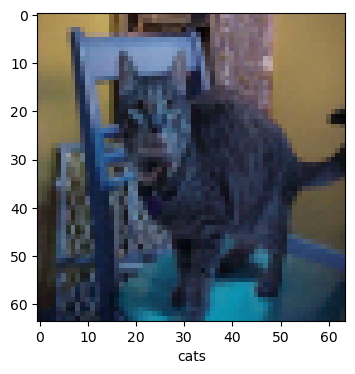

In [6]:
image = TRAIN_DATA[0][0]
plt.figure(figsize=(4,4))
plt.imshow(image)
plt.xlabel(CATEGORIES[TRAIN_DATA[0][1]])

**Randomly Displaying Grayscale Images from the Training Dataset**

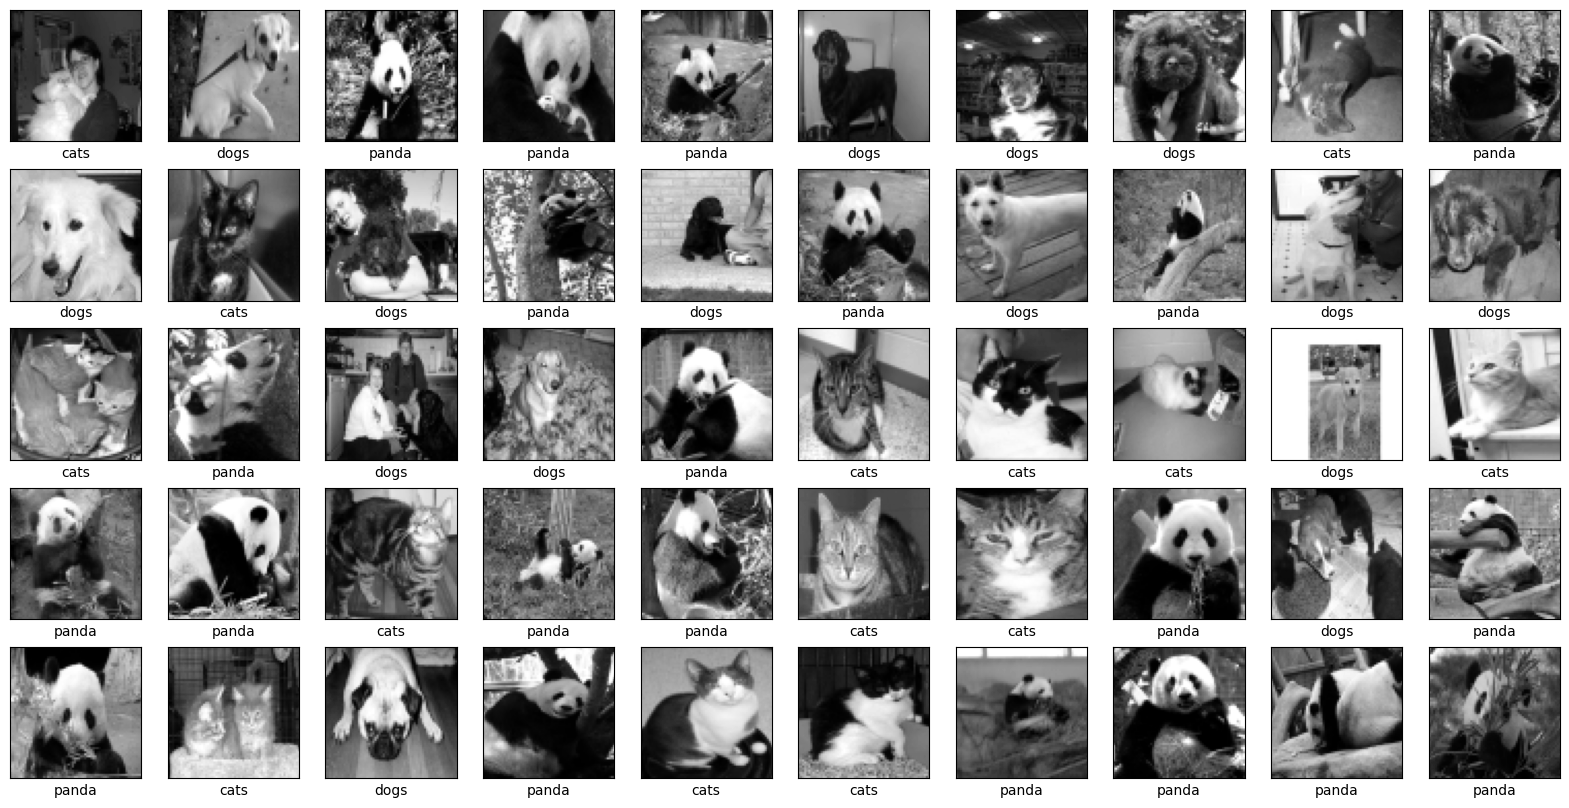

In [7]:
random.shuffle(TRAIN_DATA)

plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5, 10, i+1)
    image = TRAIN_DATA[i][0]
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    plt.imshow(image_gray, cmap="gray")
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    plt.axis()
    if i == 50:
        break
plt.show()

**Splitting Data into K-Folds for Cross-Validation**

In [8]:
Folds = []
for i in range(5):
    Folds.append(TRAIN_DATA[i::5])
len(Folds)
for i, fold in enumerate(Folds):
    print(f"Fold {i+1}: Count: {len(fold)}")

Fold 1: Count: 600
Fold 2: Count: 600
Fold 3: Count: 600
Fold 4: Count: 600
Fold 5: Count: 600


**Calculating L2 (Euclidean) Distance Between Two Images**

In [9]:
def l2_distance(valid_fold, train_fold):
    return np.sqrt(np.sum(np.square(valid_fold - train_fold)))

**K-Nearest Neighbors (KNN) Prediction Based on Distance**

In [10]:
from collections import Counter

def knn_predict(distances, k=1):
    nearest_neighbors = distances[:k]
    labels = [label for _, label in nearest_neighbors]
    return Counter(labels).most_common(1)[0][0]

In [11]:
from collections import Counter

def knn_predict(distances, k=1):
    nearest_neighbors = distances[:k]
    labels = [label for _, label in nearest_neighbors]
    return Counter(labels).most_common(1)[0][0]
    # Convert all images in TRAIN_DATA to grayscale + flatten + normalize
X = []
y = []

for features, label in TRAIN_DATA:
    gray = cv.cvtColor(features, cv.COLOR_BGR2GRAY)
    flat = gray.flatten() / 255.0
    X.append(flat)
    y.append(label)

X = np.array(X)
y = np.array(y)



**K-NN Cross-Validation with Accuracy Plotting**

K: 1 Average Accuracy: 0.45
K: 2 Average Accuracy: 0.45
K: 3 Average Accuracy: 0.47
K: 4 Average Accuracy: 0.47
K: 5 Average Accuracy: 0.48
K: 6 Average Accuracy: 0.49
K: 7 Average Accuracy: 0.49
K: 8 Average Accuracy: 0.49
K: 9 Average Accuracy: 0.50
K: 10 Average Accuracy: 0.50
K: 11 Average Accuracy: 0.51
K: 12 Average Accuracy: 0.52
K: 13 Average Accuracy: 0.52
K: 14 Average Accuracy: 0.53
K: 15 Average Accuracy: 0.53
K: 16 Average Accuracy: 0.53
K: 17 Average Accuracy: 0.53
K: 18 Average Accuracy: 0.54
K: 19 Average Accuracy: 0.55
K: 20 Average Accuracy: 0.55
K: 21 Average Accuracy: 0.55
K: 22 Average Accuracy: 0.55
K: 23 Average Accuracy: 0.56
K: 24 Average Accuracy: 0.55
K: 25 Average Accuracy: 0.56
K: 26 Average Accuracy: 0.55
K: 27 Average Accuracy: 0.55
K: 28 Average Accuracy: 0.55
K: 29 Average Accuracy: 0.56
K: 30 Average Accuracy: 0.56
Fold Accuracies: [[0.44333333333333336, 0.4533333333333333, 0.445, 0.45166666666666666, 0.4716666666666667], [0.44333333333333336, 0.453333

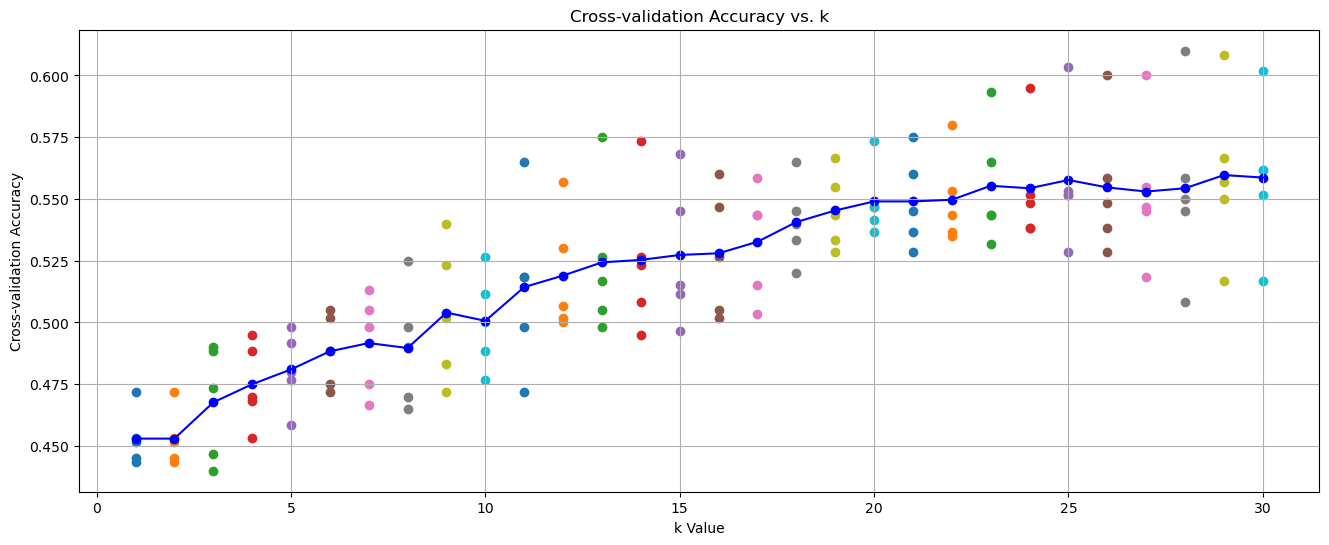

In [12]:
                                                                                 # Lists to store accuracies for each fold and the average accuracy for each k
fold_results = []
average_results = []

                                                                                 # Loop through k values from 1 to 30
for k_value in range(1, 31):
    fold_accuracies = []

                                                                                # Loop through each fold as the validation set
    for fold_index in range(len(Folds)):
        validation_set = Folds[fold_index]
        training_set = [item for j, fold in enumerate(Folds) if j != fold_index for item in fold]

        predictions = []
        for val_img in validation_set:
                                                                                # Calculate distances between validation image and all training images
            distances = [(l2_distance(val_img[0], train_img[0]), train_img[1]) for train_img in training_set]
            distances.sort()

                                                                                 # Predict label based on k nearest neighbors
            predicted_label = knn_predict(distances, k_value)
            predictions.append(1 if predicted_label == val_img[1] else 0)

                                                                                 # Calculate accuracy for this fold
        fold_accuracy = sum(predictions) / len(predictions)
        fold_accuracies.append(fold_accuracy)

                                                                                # Store accuracies and calculate average accuracy for this k
    fold_results.append(fold_accuracies)
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    average_results.append(avg_accuracy)
    print(f"K: {k_value} Average Accuracy: {avg_accuracy:.2f}")

print(f"Fold Accuracies: {fold_results}")

                                                                                # Plotting the results
plt.figure(figsize=(16, 6))

                                                                                # Scatter plot for fold accuracies
for k_index, fold_accuracy in enumerate(fold_results):
    plt.scatter([k_index + 1] * len(fold_accuracy), fold_accuracy)

                                                                                # Line plot for average accuracies
plt.plot(range(1, 31), average_results, color='blue')
plt.scatter(range(1, 31), average_results, color='blue')

plt.xlabel('k Value')
plt.ylabel('Cross-validation Accuracy')
plt.title('Cross-validation Accuracy vs. k')
plt.grid(True)
plt.show()


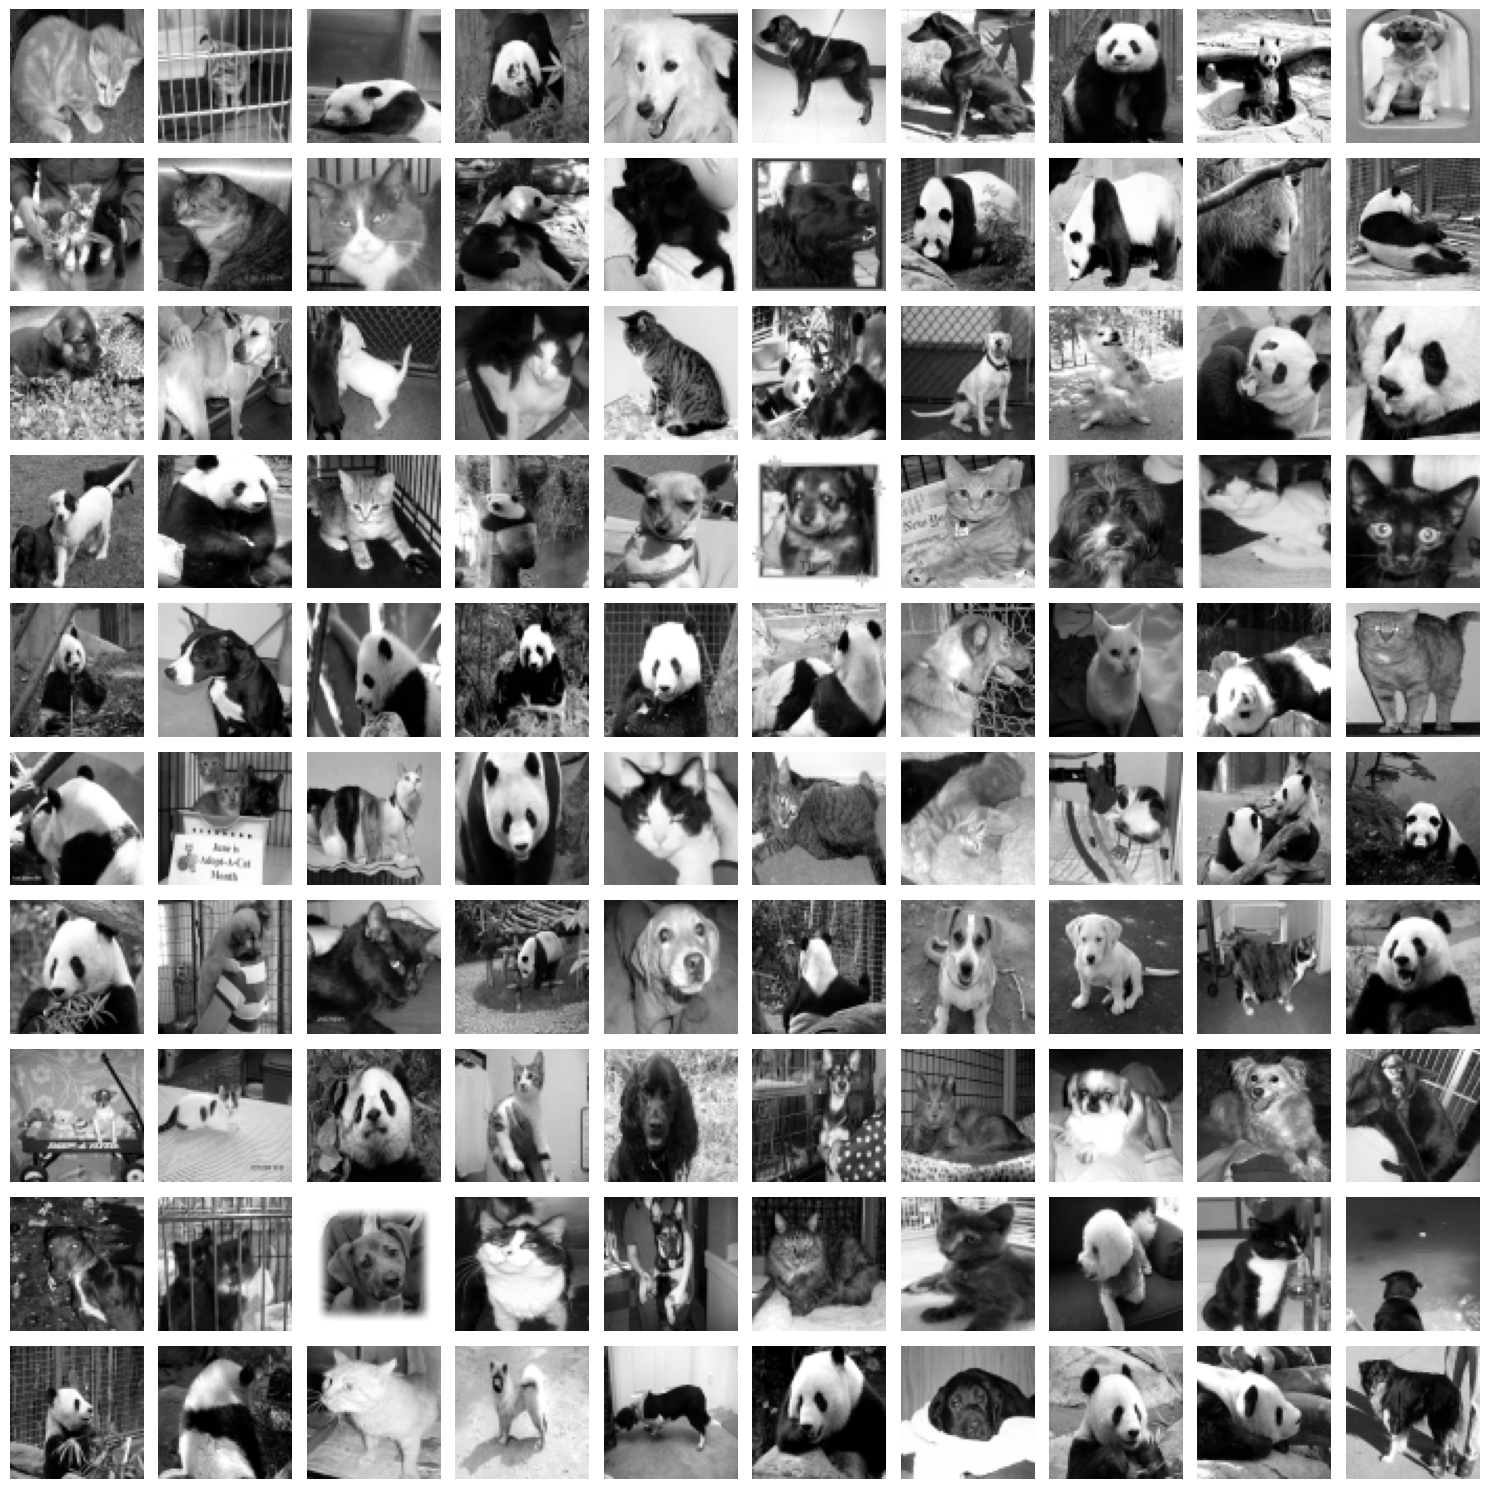

In [13]:
import matplotlib.pyplot as plt
import cv2
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(15, 15))  # Set canvas size

for i in range(100):
    plt.subplot(10, 10, i + 1)  # 10 rows × 10 columns
    image = TRAIN_DATA[i][0]
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(image_gray, cmap='gray')
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')

plt.tight_layout()
plt.show()